### Questions to Ask

1. What is, on average, the amount of salary that produces one fantasy point?

2. How many fantasy points does each position produce?

3. How does number of fantasy points per game trend over time?

4. What is the spread of fantasy points a player scores in a game? What about the spread of salary required to use that player?

5. What is the correlation between player fantasy points and player salary?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 80)

In [2]:
dfs = pd.read_csv('CleanCombinedDFSAll.csv',index_col=0)

/Users/gauravkumar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#pd.DataFrame(dfs.groupby(['Opponent','Date'])['OpponentRank'].mean()).unstack(0)
dfs = dfs[(dfs.Team != 'EAST') & (dfs.Team != 'WEST')]
dfs

Player     MP    FG   FGA    FG%   3P  3PA    3P%  \
0            Kristaps Porzingis  32:48   5.0  13.0  0.385  3.0  5.0  0.600   
1               Carmelo Anthony  30:05   8.0  18.0  0.444  1.0  4.0  0.250   
2                  Derrick Rose  29:35   7.0  17.0  0.412  1.0  2.0  0.500   
3                  Courtney Lee  19:37   0.0   5.0  0.000  0.0  2.0  0.000   
4                   Joakim Noah  19:31   0.0   1.0  0.000  0.0  0.0  0.000   
5                Justin Holiday  26:27   2.0   7.0  0.286  2.0  3.0  0.667   
6              Brandon Jennings  21:14   1.0   7.0  0.143  0.0  4.0  0.000   
7                  Lance Thomas  16:37   1.0   4.0  0.250  0.0  0.0  0.000   
8                  Kyle O'Quinn  15:24   1.0   3.0  0.333  0.0  2.0  0.000   
9             Willy Hernangomez   9:26   2.0   3.0  0.667  0.0  0.0  0.000   
10         Mindaugas Kuzminskas   9:14   3.0   5.0  0.600  1.0  3.0  0.333   
11                    Ron Baker   6:44   2.0   3.0  0.667  1.0  1.0  1.000   
12                Sasha Vujacic   3:18   0.0   1.0  0.000  0.0  1.0  0.000   
13                 LeBron James  32:23   9.0  14.0  0.643  0.0  3.0  0.000   
14                 Kyrie Irving  29:48  12.0  22.0  0.545  4.0  7.0  0.571   
15                   J.R. Smith  25:14   3.0  13.0  0.231  2.0  8.0  0.250   
16                   Kevin Love  24:58   6.0  15.0  0.400  2.0  6.0  0.333   
17             Tristan Thompson  22:25   0.0   1.0  0.000  0.0  0.0  0.000   
18            Richard Jefferson  25:47   5.0   7.0  0.714  2.0  3.0  0.667   
19                Mike Dunleavy  22:32   2.0   3.0  0.667  0.0  1.0  0.000   
20                Channing Frye  14:09   2.0   6.0  0.333  2.0  5.0  0.400   
21                Iman Shumpert  13:51   1.0   3.0  0.333  0.0  1.0  0.000   
22              DeAndre Liggins  12:00   2.0   3.0  0.667  0.0  0.0  0.000   
23                 Jordan McRae   5:50   1.0   4.0  0.250  0.0  0.0  0.000   
24               Chris Andersen   5:34   1.0   1.0  1.000  0.0  0.0  0.000   
25                  James Jones   5:30   1.0   2.0  0.500  1.0  1.0  1.000   
26            LaMarcus Aldridge  35:11  10.0  20.0  0.500  1.0  1.0  1.000   
27                Kawhi Leonard  32:03  10.0  21.0  0.476  0.0  3.0  0.000   
28                  Tony Parker  26:28   4.0   9.0  0.444  1.0  2.0  0.500   
29                Kyle Anderson  22:24   1.0   1.0  1.000  1.0  1.0  1.000   
...                         ...    ...   ...   ...    ...  ...  ...    ...   
80735              Tony Bradley    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80736               Erik McCree    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80737             C.J. McCollum    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80738            Meyers Leonard    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80739               C.J. Wilcox    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80740          Maurice Harkless    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80741      Georgios Papagiannis    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80742              Nene Hilario    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80743               Eric Gordon    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80744             Ryan Anderson    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80745              Trevor Ariza    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80746              James Harden    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80747              Clint Capela    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80748              Markel Brown    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80749                Chris Paul    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80750  Luc Richard Mbah a Moute    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80751            Tim Quarterman    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80752             Le'bryan Nash    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80753            Garrett Temple    NaN   0.0   0.0  0.000  0.0  0.0  0.000   
80754             Bruno Caboclo    NaN   0.0   

In [4]:
#question 1
np.sum(dfs.DraftKingsSalary)/np.sum(dfs.FantasyPointsDraftKings)

317.62935453577995

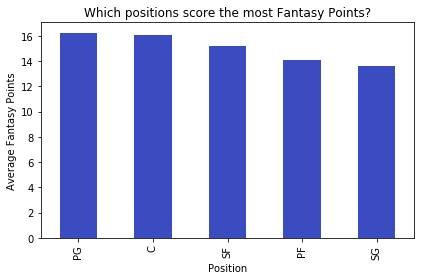

In [16]:
#question 2
pos_fpts = dfs.groupby('Position')['FantasyPointsDraftKings'].agg(['count','sum'])
pos_fpts['avg_fpts'] = pos_fpts['sum']/pos_fpts['count']
pos_fpts = pos_fpts[(pos_fpts.index != 'G') & (pos_fpts.index != 'F')].sort_values(by='avg_fpts',ascending=False)
plot = pos_fpts.avg_fpts.plot(kind='bar',colormap='coolwarm',title = 'Which positions score the most Fantasy Points?')
plt.xlabel('Position')
plt.ylabel('Average Fantasy Points')
plt.tight_layout()
plt.show()
plot.get_figure().savefig('question2')

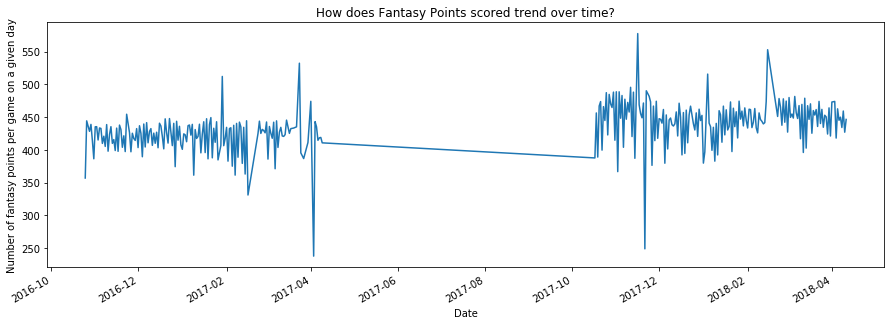

In [26]:
#question 3
game_fpts = dfs.groupby('Date')['FantasyPointsDraftKings','GameID'].agg({'FantasyPointsDraftKings':'sum','GameID':'nunique'})
game_fpts = game_fpts[game_fpts.FantasyPointsDraftKings != 0]
game_fpts['points_per_day'] = game_fpts.FantasyPointsDraftKings/game_fpts.GameID
game_fpts.index = pd.to_datetime(game_fpts.index)
fig, ax = plt.subplots()
plot = pd.Series(game_fpts.points_per_day).plot(figsize=(15,5),legend=False,title = 'How does Fantasy Points scored trend over time?',ax=ax)
plt.ylabel('Number of fantasy points per game on a given day')
plot.get_figure().savefig('question3')

In [50]:
game_fpts.sort_values('points_per_day')

FantasyPointsDraftKings  GameID  points_per_day
Date                                                       
2017-04-03                    475.8       2      237.900000
2017-11-21                    498.1       2      249.050000
2017-02-16                    993.5       3      331.166667
2016-10-25                   1428.3       4      357.075000
2017-01-09                   1445.7       4      361.425000
2017-02-07                   1446.0       4      361.500000
2017-02-14                   1452.6       4      363.150000
2017-11-02                   1100.5       3      366.833333
2017-03-07                   1484.9       4      371.225000
2016-12-27                   1871.9       5      374.380000
2017-02-05                   1500.6       4      375.150000
2017-11-26                   1505.7       4      376.425000
2017-02-12                   1897.1       5      379.420000
2017-12-05                   1518.6       4      379.650000
2018-01-01                   1899.1       5      379.820000
2018-01-09                   1914.1       5      382.820000
2017-02-02                   1914.1       5      382.820000
2017-01-26                   1923.7       5      384.740000
2017-03-02                   1543.9       4      385.975000
2017-01-19                   2318.1       6      386.350000
2016-10-31                   1932.1       5      386.420000
2017-03-27                   2707.4       7      386.771429
2017-11-14                   1548.7       4      387.175000
2017-10-17                   1163.2       3      387.733333
2017-01-22                   1939.4       5      387.880000
2017-02-09                   2332.9       6      388.816667
2017-10-19                   1556.2       4      389.050000
2016-12-04                   1947.7       5      389.540000
2018-01-11                   1961.6       5      392.320000
2017-12-17                   1961.9       5      392.380000
2017-12-19                   1578.6       4      394.650000
2017-03-25                   2372.9       6      395.483333
2017-01-14                   2372.9       6      395.483333
2017-01-17                   2375.4       6      395.900000
2018-03-12                   1980.3       5      396.060000
2018-01-02                   2382.1       6      397.016667
2016-11-26                   2382.7       6      397.116667
2016-11-22                   1987.2       5      397.440000
2018-01-21                   1987.3       5      397.460000
2016-11-17                   2386.8       6      397.800000
2016-11-10                   1990.1       5      398.020000
2016-11-15                   2394.2       6      399.033333
2018-01-07                   2396.1       6      399.350000
2017-10-22                   1598.5       4      399.625000
2017-01-01                   2405.2       6      400.866667
2017-12-07                   2007.3       5      401.460000
2016-12-19                   2409.5       6      401.583333
2018-03-14                   2013.7       5      402.740000
2016-12-15                   2419.6       6      403.266667
2016-12-01                   2824.6       7      403.514286
2017-03-09                   2422.8       6      403.800000
2016-11-20                   2827.8       7      403.971429
2017-11-06                   1615.9       4      403.975000
2016-12-06                   2831.0       7      404.428571
2016-11-08                   2837.1       7      405.300000
2017-01-30                   2844.9       7      406.414286
2016-12-25                   2439.2       6      406.533333
2017-01-28                   3254.6       8      406.825000
2016-12-11                   2441.5       6      406.916667
2016-12-31                   2854.2       7      407.742857
2016-11-06                   2869.2       7      409.885714
2016-11-13                   2459.7       6      409.950000
2016-12-13                   2870.4       7      410.057143
2016-12-22                   2462.3       6      410.383333
2017-04-09                   3286.0       8      410

pandas.core.indexes.base.Index

In [47]:
pd.set_option('display.max_rows', 500)

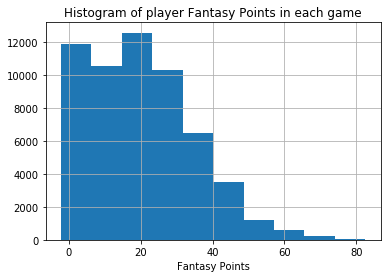

In [28]:
#question 4
plot = dfs[dfs.FantasyPointsDraftKings != 0].FantasyPointsDraftKings.hist()
plt.title('Histogram of player Fantasy Points in each game')
plt.xlabel('Fantasy Points')
plot.get_figure().savefig('question4p1')

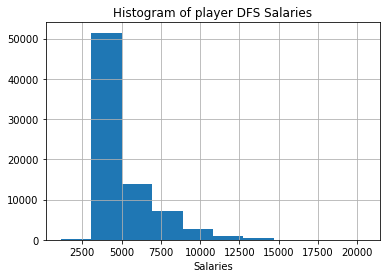

In [31]:
plot = dfs[dfs.DraftKingsSalary != 0].DraftKingsSalary.hist()
plt.title('Histogram of player DFS Salaries')
plt.xlabel('Salaries')
plot.get_figure().savefig('question4p2')

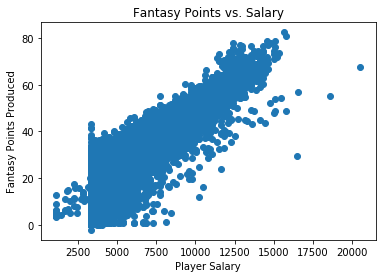

In [34]:
#question 5
new_dfs = dfs[(dfs.FantasyPointsDraftKings != 0) & (dfs.DraftKingsSalary != 0)]
plot = plt.scatter(new_dfs.DraftKingsSalary,new_dfs.FantasyPointsDraftKings)
plt.title('Fantasy Points vs. Salary')
plt.xlabel('Player Salary')
plt.ylabel('Fantasy Points Produced')
plot.get_figure().savefig('question5')

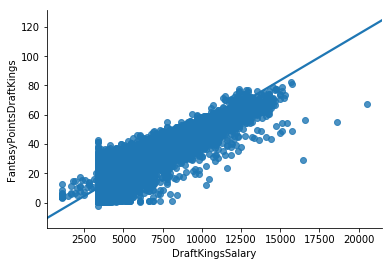

In [36]:
import seaborn as sns

sns.regplot(new_dfs.DraftKingsSalary,new_dfs.FantasyPointsDraftKings,ci=None)
sns.despine()

In [128]:
points = dfs.groupby(['Player','Date'])['FantasyPointsDraftKings'].mean().reset_index()
points = pd.DataFrame(points.pivot_table(index='Date',columns='Player',values='FantasyPointsDraftKings').to_records())
points

Date  A.J. Hammons  A.j. Hammons  Aaron Brooks  Aaron Gordon  \
0    2016-10-25           NaN           NaN           NaN           NaN   
1    2016-10-26           NaN           5.5          15.8          30.7   
2    2016-10-27           NaN           NaN           NaN           NaN   
3    2016-10-28           0.0           1.1           1.0          32.7   
4    2016-10-29           NaN           NaN           1.0          32.6   
5    2016-10-30           NaN           1.1           NaN           NaN   
6    2016-10-31           NaN           NaN           NaN           NaN   
7    2016-11-01           NaN           NaN           1.0          33.1   
8    2016-11-02           NaN           1.0           NaN           NaN   
9    2016-11-03           NaN           NaN           0.9          31.4   
10   2016-11-04           0.0           1.1           NaN           NaN   
11   2016-11-05           NaN           NaN           1.0          32.3   
12   2016-11-06           NaN           1.1           NaN           NaN   
13   2016-11-07           NaN           NaN           0.9          31.0   
14   2016-11-08           NaN           1.5           NaN           NaN   
15   2016-11-09           0.0           1.4           1.0          31.0   
16   2016-11-10           NaN           NaN           NaN           NaN   
17   2016-11-11           NaN           NaN           0.9          23.2   
18   2016-11-12           NaN           NaN           8.2           NaN   
19   2016-11-13           NaN           NaN           NaN          24.7   
20   2016-11-14           0.0           0.0           8.7          25.3   
21   2016-11-15           NaN           NaN           NaN           NaN   
22   2016-11-16           NaN           0.0           9.7          26.5   
23   2016-11-17           NaN           NaN           NaN           NaN   
24   2016-11-18           0.0           0.0          14.1           NaN   
25   2016-11-19           NaN           0.0           NaN          25.6   
26   2016-11-20           NaN           NaN          13.1           NaN   
27   2016-11-21           NaN           0.0          13.1          27.8   
28   2016-11-22           NaN           NaN           NaN           NaN   
29   2016-11-23           0.0           0.0          13.8          27.9   
..          ...           ...           ...           ...           ...   
302  2018-03-12           NaN           NaN           NaN           NaN   
303  2018-03-13           NaN           NaN           3.8           0.0   
304  2018-03-14           NaN           NaN           NaN           0.0   
305  2018-03-15           NaN           NaN           NaN           NaN   
306  2018-03-16           NaN           NaN           NaN           0.0   
307  2018-03-17           NaN           NaN           3.8           NaN   
308  2018-03-18           NaN           NaN           4.2           NaN   
309  2018-03-19           NaN           NaN           NaN           NaN   
310  2018-03-20           NaN           NaN           0.0          44.7   
311  2018-03-21           NaN           NaN           NaN           NaN   
312  2018-03-22           NaN           NaN           NaN          41.1   
313  2018-03-23           NaN           NaN           0.0           NaN   
314  2018-03-24           NaN           NaN           0.0          40.9   
315  2018-03-25           NaN           NaN           NaN           NaN   
316  2018-03-26           NaN           NaN           7.7           NaN   
317  2018-03-27           NaN           NaN           NaN           NaN   
318  2018-03-28           NaN           NaN           4.3          42.7   
319  2018-03-29           NaN           NaN           NaN           NaN   
320  2018-03-30           NaN           NaN           3.8          41.6   
321  2018-03-31           NaN           NaN           NaN           NaN   
322  2018-04-01           NaN           NaN           3.9          40.4   
323  2018-04-03           NaN       

In [108]:
players = points.Player.unique()
players

array(['A.J. Hammons', 'A.j. Hammons', 'Aaron Brooks', 'Aaron Gordon',
       'Aaron Harrison', 'Aaron Jackson', 'Abdel Nader', 'Adreian Payne',
       'Al Horford', 'Al Jefferson', 'Al-Farouq Aminu', 'Alan Anderson',
       'Alan Williams', 'Alec Burks', 'Alec Peters', 'Alex Abrines',
       'Alex Caruso', 'Alex Len', 'Alex Poythress', 'Alexis Ajinca',
       'Alfonzo McKinnie', 'Allen Crabbe', 'Alonzo Gee',
       'Amile Jefferson', 'Amir Johnson', 'Anderson Varejao',
       'Andre Drummond', 'Andre Iguodala', 'Andre Ingram',
       'Andre Roberson', 'Andrew Andrews', 'Andrew Bogut',
       'Andrew Harrison', 'Andrew Nicholson', 'Andrew White',
       'Andrew White III', 'Andrew Wiggins', 'Ante Zizic',
       'Anthony Bennett', 'Anthony Brown', 'Anthony Davis',
       'Anthony Morrow', 'Anthony Tolliver', 'Antonio Blakeney',
       'Antonius Cleveland', 'Archie Goodwin', 'Arinze Onuaku',
       'Aron Baynes', 'Arron Afflalo', 'Arturas Gudaitis',
       'Austin Rivers', 'Avery Bradley

In [129]:
points['A.J. Hammons'] = points['A.J. Hammons'].fillna(points['A.j. Hammons'])
points = points.drop('A.j. Hammons',axis=1)
points['C.J. Williams'] = points['C.J. Williams'].fillna(points['C.j. Williams'])
points = points.drop('C.j. Williams',axis=1)
points['Caris LeVert'] = points['Caris LeVert'].fillna(points['Caris Levert'])
points = points.drop('Caris Levert',axis=1)
points['C.J. McCollum'] = points['C.J. McCollum'].fillna(points['CJ McCollum'])
points = points.drop('CJ McCollum',axis=1)
points['Derrick Walton Jr.'] = points['Derrick Walton Jr.'].fillna(points['Derrick Walton'])
points = points.drop('Derrick Walton',axis=1)
points['Dorian Finney-Smith'] = points['Dorian Finney-Smith'].fillna(points['Dorian Finney-smith'])
points = points.drop('Dorian Finney-smith',axis=1)
points['Frank Mason III'] = points['Frank Mason III'].fillna(points['Frank Mason'])
points = points.drop('Frank Mason',axis=1)
points['Fred VanVleet'] = points['Fred VanVleet'].fillna(points['Fred Vanvleet'])
points = points.drop('Fred Vanvleet',axis=1)
points['Glenn Robinson III'] = points['Glenn Robinson III'].fillna(points['Glenn Robinson'])
points = points.drop('Glenn Robinson',axis=1)
points['J.P. Tokoto'] = points['J.P. Tokoto'].fillna(points['JP Tokoto II'])
points = points.drop('JP Tokoto II',axis=1)
points['Kelly Oubre Jr.'] = points['Kelly Oubre Jr.'].fillna(points['Kelly Oubre'])
points = points.drop('Kelly Oubre',axis=1)
points['Larry Nance Jr.'] = points['Larry Nance Jr.'].fillna(points['Larry Nance'])
points = points.drop('Larry Nance',axis=1)
points['Larry Drew II'] = points['Larry Drew II'].fillna(points['Larry Drew'])
points = points.drop('Larry Drew',axis=1)
points['Marcus Georges-Hunt'] = points['Marcus Georges-Hunt'].fillna(points['Marcus Georges-hunt'])
points = points.drop('Marcus Georges-hunt',axis=1)
points['Maurice Ndour'] = points['Maurice Ndour'].fillna(points['Maurice Daly Ndour'])
points = points.drop('Maurice Daly Ndour',axis=1)
points['Maximilian Kleber'] = points['Maximilian Kleber'].fillna(points['Maxi Kleber'])
points = points.drop('Maxi Kleber',axis=1)
points['Naz Mitrou-Long'] = points['Naz Mitrou-Long'].fillna(points['Nazareth Mitrou-Long'])
points = points.drop('Nazareth Mitrou-Long',axis=1)
points['P.J. Dozier'] = points['P.J. Dozier'].fillna(points['PJ Dozier'])
points = points.drop('PJ Dozier',axis=1)
points['Patrick McCaw'] = points['Patrick McCaw'].fillna(points['Patrick Mccaw'])
points = points.drop('Patrick Mccaw',axis=1)
points['Rodney McGruder'] = points['Rodney McGruder'].fillna(points['Rodney Mcgruder'])
points = points.drop('Rodney Mcgruder',axis=1)
points['Sheldon McClellan'] = points['Sheldon McClellan'].fillna(points['Sheldon Mcclellan'])
points = points.drop('Sheldon Mcclellan',axis=1)
points['T.J. Leaf'] = points['T.J. Leaf'].fillna(points['TJ Leaf'])
points = points.drop('TJ Leaf',axis=1)
points['Taurean Prince'] = points['Taurean Prince'].fillna(points['Taurean Waller-Prince'])
points = points.drop('Taurean Waller-Prince',axis=1)
points['Tim Hardaway Jr.'] = points['Tim Hardaway Jr.'].fillna(points['Tim Hardaway'])
points = points.drop('Tim Hardaway',axis=1)
points['Timothe Luwawu-Cabarrot'] = points['Timothe Luwawu-Cabarrot'].fillna(points['Timothe Luwawu'])
points = points.drop('Timothe Luwawu',axis=1)
points['Trey McKinney-Jones'] = points['Trey McKinney-Jones'].fillna(points['Trey Mckinney Jones'])
points = points.drop('Trey Mckinney Jones',axis=1)
points['Walter Lemon Jr.'] = points['Walter Lemon Jr.'].fillna(points['Walt Lemon, Jr.'])
points = points.drop('Walt Lemon, Jr.',axis=1)

In [132]:
points

Date  A.J. Hammons  Aaron Brooks  Aaron Gordon  Aaron Harrison  \
0    2016-10-25           NaN           NaN           NaN             NaN   
1    2016-10-26           5.5          15.8          30.7             3.6   
2    2016-10-27           NaN           NaN           NaN             NaN   
3    2016-10-28           0.0           1.0          32.7             0.6   
4    2016-10-29           NaN           1.0          32.6             0.6   
5    2016-10-30           1.1           NaN           NaN             NaN   
6    2016-10-31           NaN           NaN           NaN             NaN   
7    2016-11-01           NaN           1.0          33.1             NaN   
8    2016-11-02           1.0           NaN           NaN             0.6   
9    2016-11-03           NaN           0.9          31.4             NaN   
10   2016-11-04           0.0           NaN           NaN             0.7   
11   2016-11-05           NaN           1.0          32.3             NaN   
12   2016-11-06           1.1           NaN           NaN             NaN   
13   2016-11-07           NaN           0.9          31.0             0.0   
14   2016-11-08           1.5           NaN           NaN             NaN   
15   2016-11-09           0.0           1.0          31.0             0.9   
16   2016-11-10           NaN           NaN           NaN             NaN   
17   2016-11-11           NaN           0.9          23.2             8.2   
18   2016-11-12           NaN           8.2           NaN             NaN   
19   2016-11-13           NaN           NaN          24.7             8.8   
20   2016-11-14           0.0           8.7          25.3             NaN   
21   2016-11-15           NaN           NaN           NaN             7.4   
22   2016-11-16           0.0           9.7          26.5             NaN   
23   2016-11-17           NaN           NaN           NaN             NaN   
24   2016-11-18           0.0          14.1           NaN             7.8   
25   2016-11-19           0.0           NaN          25.6             1.1   
26   2016-11-20           NaN          13.1           NaN             NaN   
27   2016-11-21           0.0          13.1          27.8             1.1   
28   2016-11-22           NaN           NaN           NaN             NaN   
29   2016-11-23           0.0          13.8          27.9             0.9   
..          ...           ...           ...           ...             ...   
302  2018-03-12           NaN           NaN           NaN             NaN   
303  2018-03-13           NaN           3.8           0.0             NaN   
304  2018-03-14           NaN           NaN           0.0             NaN   
305  2018-03-15           NaN           NaN           NaN             NaN   
306  2018-03-16           NaN           NaN           0.0             NaN   
307  2018-03-17           NaN           3.8           NaN             NaN   
308  2018-03-18           NaN           4.2           NaN             NaN   
309  2018-03-19           NaN           NaN           NaN             NaN   
310  2018-03-20           NaN           0.0          44.7             NaN   
311  2018-03-21           NaN           NaN           NaN             NaN   
312  2018-03-22           NaN           NaN          41.1             0.0   
313  2018-03-23           NaN           0.0           NaN             NaN   
314  2018-03-24           NaN           0.0          40.9             5.0   
315  2018-03-25           NaN           NaN           NaN             NaN   
316  2018-03-26           NaN           7.7           NaN             NaN   
317  2018-03-27           NaN           NaN           NaN             5.9   
318  2018-03-28           NaN           4.3          42.7            12.4   
319  2018-03-29           NaN           NaN           NaN             NaN   
320  2018-03-30           NaN           3.8          41.6            14.9   
321  2018-03-31           NaN           NaN           NaN             NaN   
322  20

/Users/gauravkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  """Entry point for launching an IPython kernel.


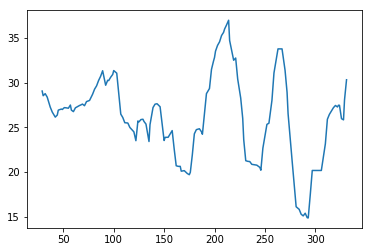

In [144]:
pd.rolling_mean(points['Aaron Gordon'].dropna(),15).plot()

In [172]:
test = points['Aaron Gordon'].dropna().reindex(range(len(test)))
#[(test[i-1] + test[i])/i for i in range(1,len(test.index))]

[nan,
 nan,
 nan,
 16.325000000000003,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.6900000000000002,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.2918918918918918,
 nan,
 nan,
 nan,
 nan,
 1.2738095238095237,
 nan,
 nan,
 1.3244444444444443,
 nan,
 nan,
 nan,
 1.079591836734694,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.9620689655172413,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.8059701492537313,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.7999999999999999,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.6926315789473684,
 nan,
 nan,
 nan,
 nan,
 0.636,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.548,
 nan,
 nan,
 nan,
 nan,
 0.45307692307692304,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.20808823529411766,

In [170]:
test

1      30.7
3      32.7
4      32.6
7      33.1
9      31.4
11     32.3
13     31.0
15     31.0
17     23.2
19     24.7
20     25.3
22     26.5
25     25.6
27     27.8
29     27.9
30     22.8
32     36.2
34     26.8
36     22.3
37     25.5
39     24.0
41     25.3
42     28.2
44     26.7
45     32.9
48     27.1
49     25.8
51     28.7
53     27.4
55     27.3
       ... 
273     0.0
275     0.0
277     0.0
279     0.0
281     0.0
284    32.7
286    31.5
288    37.9
290    42.9
292    38.2
293    40.0
295    38.5
297    41.0
299     0.0
300     0.0
303     0.0
304     0.0
306     0.0
310    44.7
312    41.1
314    40.9
318    42.7
320    41.6
322    40.4
323    41.1
324    39.9
326    16.1
328    39.0
329    33.4
331    33.8
Name: Aaron Gordon, Length: 164, dtype: float64